# Занятие 4
# Прикладная алгебра и численные методы
## Интерполяция: полиномы Лагранжа, сплайны и кривые Безье

In [1]:
import numpy as np
import scipy.linalg
import sympy
from sympy import S, latex, Eq, Matrix
import matplotlib.pyplot as plt
from IPython.display import Latex

## Многочлен Лагранжа
$$
f(x) = L(x) = \sum_{i=1}^n y_i 
\frac{(x - x_0)(x - x_1)...(x - x_{i-1})(x - x_{i+1})...(x - x_n)}{(x_i - x_0)(x_i - x_1)...(x_i - x_{i-1})(x_i - x_{i+1})...(x_i - x_n)}, 
\quad y_i = f(x_i), \quad i = 0, ..., n.
$$
## Пример 1
Построить параболу по трем точкам (-1, -2), (0, -1), (1, 2).

In [2]:
x = S('x')
X = (-1, 0, 1)
Y = (-2, -1, 2)
Lagrange1 = 0
for i in range(3):
    Li = Y[i]
    for j in range(3):
        if i != j:
            Li *= ((x - X[j]) / (X[i] - X[j]))
    Lagrange1 += Li
display(Latex(f'Полином\ Лагранжа\ {latex(Lagrange1)},\\\\\
упрощенный\ {latex(sympy.simplify(sympy.expand(Lagrange1)))}'))  

<IPython.core.display.Latex object>

## Пример 2 Линейная регрессия
Для данных Примера 1 построим параболу методом линейной регрессии (исключительно для тренировки и повторения, в жизни так не делают!)

Составим матрицу  из $A$ из значений $x$ и $x^2$ и матрицу $Y$, далее все как обычно - псевдообратная матрица и произведение псевдообратной к  $A$ и  $Y$:

In [3]:
X2 = [ -1, 0, 1]
A2 = np.array([[1, item, item ** 2] for item in X2])
Y2 = np.array([[-2], [-1], [2]])
res2 = np.linalg.pinv(A2) @ Y2
a2, b2, c2 = [round(item, 2) for item in  res2[:, 0]]
display(Latex(f'A = {latex(Matrix(A2))},\ \
Y = {Y},\ a = {a2},\ b = {b2},\ c = {c2}'))

<IPython.core.display.Latex object>

Изобразим на графике точки исходных данных и полученную линию регрессии:

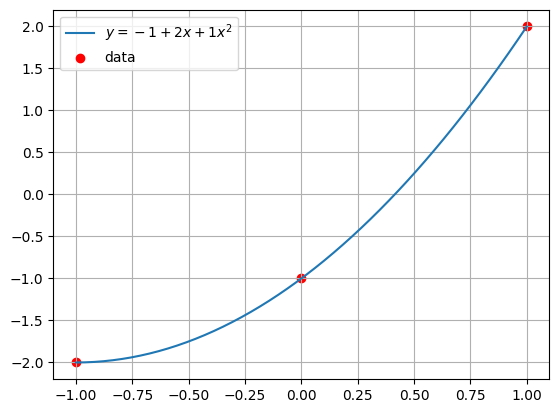

In [4]:
X_ls2 = np.linspace(X2[0], X2[-1])
plt.plot(X_ls2, a2 + b2 * X_ls2 + c2 * X_ls2 ** 2,
         label='$y = {a} + {b}x + {c}x^2$'.format(a=round(a2),
                                                  b=round(b2), c=round(c2))
         )
plt.scatter(X2, Y2, color='red', label='data')
plt.grid()
plt.legend()

Альтернативный код:

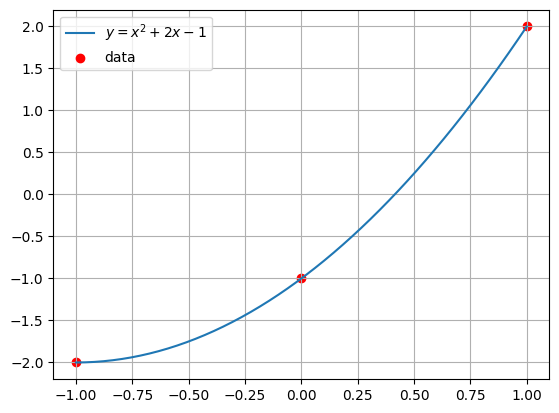

In [5]:
from sympy.abc import x, y
a, b, c = [round(num) for num in (a2, b2, c2)]
X_ls2 = np.linspace(X2[0], X2[-1])
plt.plot(X_ls2, a2 + b2 * X_ls2 + c2 * X_ls2 ** 2,
         label=latex(Eq(y, a + b * x + c * x ** 2), mode='inline')
         )
plt.scatter(X2, Y2, color='red', label='data')
plt.grid()
plt.legend()

## Пример 3 Линейная регрессия
Для данных точек построим наилучшую в смысле среднеквадратического отклонения параболу методом линейной регрессии.
$$
\begin{matrix}
X & -3 & -1 & 0 & 1 & 3\\
Y & -4 & -0.8 & 1.6 & 2.3 & 1.5
\end{matrix}
$$

In [6]:
X3 = [ -3, -1, 0, 1, 3]
A3 = np.array([[1, item, item ** 2] for item in X3])
Y3 = np.array([[-4], [-0.8], [1.6], [2.3], [1.5]])
res3 = np.linalg.pinv(A3) @ Y3
a3, b3, c3 = [round(item, 2) for item in  res3[:, 0]]
display(Latex(f'a = {a3},\ b = {b3},\ c = {c3}'))

<IPython.core.display.Latex object>

Построим график, отметим на нем исходные точки.

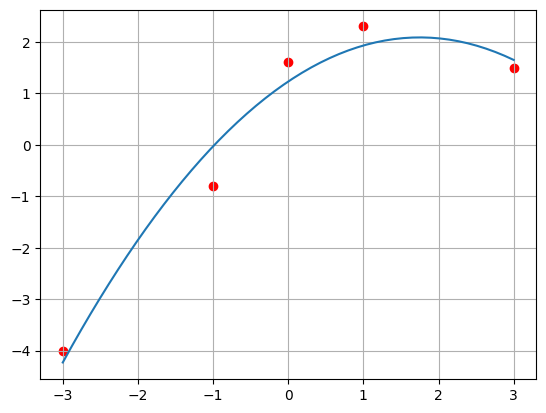

In [7]:
X_ls = np.linspace(X3[0], X3[-1])
plt.plot(X_ls, a3 + b3 * X_ls + c3 * X_ls ** 2)
plt.scatter(X3, Y3, color='red')
plt.grid()

## Пример 4
Построим полином Лагранжа для данных Примера 3:

<IPython.core.display.Latex object>

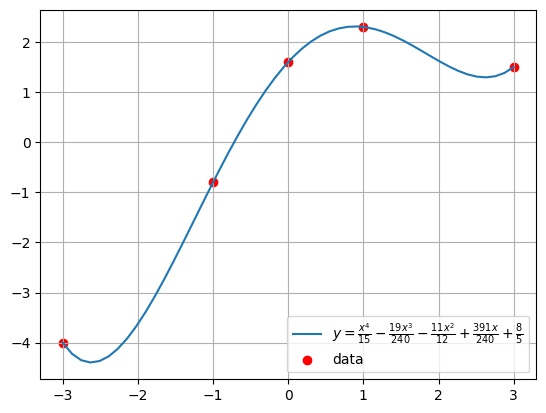

In [8]:
x = S('x')
Y3 = [-4, -S(8) / 10, S(16) / 10, S(23) / 10, S(15) / 10]
L3 = 0
n = len(X3)
for i, Li in enumerate(Y3):
    for j in range(n):
        if i != j:
            Li *= (x - X3[j]) / (X3[i] - X3[j])
    L3 += Li
L3 = sympy.simplify(sympy.expand(L3))    
X_ls = np.linspace(X3[0], X3[-1])
Y_regr = [L3.subs(x, item) for item in X_ls]
plt.plot(X_ls, Y_regr, label=f"${sympy.latex(sympy.Eq(S('y'), L3))}$")
plt.scatter(X3, Y3, color='red', label='data')
plt.grid()
plt.legend()
display(Latex(f'Полином\ Лагранжа\ {latex(L3)}'))

## Многочлен Лагранжа с scipy.interpolate.lagrange
## Пример 5
Построим полином Лагранжа для данных Примера 3 с помощью scipy.interpolate.lagrange

In [9]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [10]:
poly5 = lagrange(X3, Y3)
display(Latex(f'Polynomial(lagrange(X3, Y3)).coef:\ \
{latex(Polynomial(poly5).coef)}\\\\lagrange(X3, Y3): '),
poly5)

<IPython.core.display.Latex object>

poly1d([0.0666666666666667, -0.0791666666666667, -0.916666666666667,
       1.62916666666667, 1.60000000000000], dtype=object)

Сравним с полученными ранее коэффициентами:

In [11]:
coeffs = L3.as_coefficients_dict()
res = [round(coeffs[item], 8) for item in [x ** k for k in range(len(coeffs))]]
res.reverse()
res

[0.06666667, -0.07916667, -0.91666667, 1.62916667, 1.60000000]

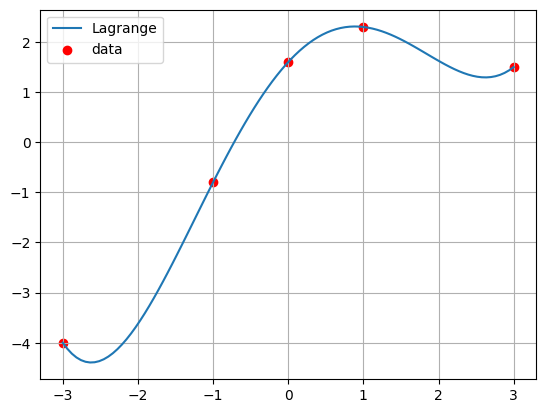

In [12]:
x3_ls = np.linspace(min(X3), max(X3), 100)
plt.plot(x3_ls, Polynomial(poly5.coef[::-1])(x3_ls), label='Lagrange')
plt.scatter(X3, Y3, color='red', label='data')
plt.grid()
plt.legend()

## Квадратичный сплайн

## Пример 7
Аппроксимировать $f(x) = x^3 - 6x^2 + 11 x - 6$ на отрезке $[0, 4]$ квадратичным сплайном с узлами 0, 2, 4.

In [13]:
def spl2(a0, a1, a2, x):
    return a0 + a1 * x + a2 * x ** 2

def dspl2(a0, a1, a2, x, x0):
    return spl2(a0, a1, a2, x).diff(x).subs(x, x0)

def f(x):
    return x ** 3 - 6 * x ** 2 + 11 * x - 6

def df(x, x0):
    return f(x).diff(x).subs(x, x0)
    
x = S('x')


x0 = 0
x1 = 2
x2 = 4
f0, f1, f2 = [f(xi) for xi in (x0, x1, x2)]
df0 = df(x, x0)
a0, a1, a2, x = sympy.symbols('a0:3 x')
print(type(x))
sys1 = [sympy.Eq(dspl2(a0, a1, a2, x, x0), df0),
        sympy.Eq(spl2(a0, a1, a2, x0), f0),
        sympy.Eq(spl2(a0, a1, a2, x1), f1)]
display(*sys1)

<class 'sympy.core.symbol.Symbol'>


Eq(a1, 11)

Eq(a0, -6)

Eq(a0 + 2*a1 + 4*a2, 0)

In [14]:
res1 = sympy.solve(sys1)
spline1 = res1[a0] + res1[a1] * x + res1[a2] * x ** 2
display(Latex(f'Коэффициенты:\ {latex(res1)},\\\\сплайн\ на\ [x_0,x_1]:\ {latex(spline1)}'))
df1 = spline1.diff(x).subs(x, x1)
sys2 = [sympy.Eq(dspl2(a0, a1, a2, x, x1), df1), 
                   sympy.Eq(spl2(a0, a1, a2, x1), f1), 
                   sympy.Eq(spl2(a0, a1, a2, x2), f2)]
res2 = sympy.solve(sys2)

spline2 = res2[a0] + res2[a1] * x + res2[a2] * x ** 2
display(Latex(f'Система\ уравнений\ на\ [x_1,x_2]:\ {latex(sys2)},\
\\\\сплайн\ на\ [x_1,x_2]:\ {latex(spline2)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

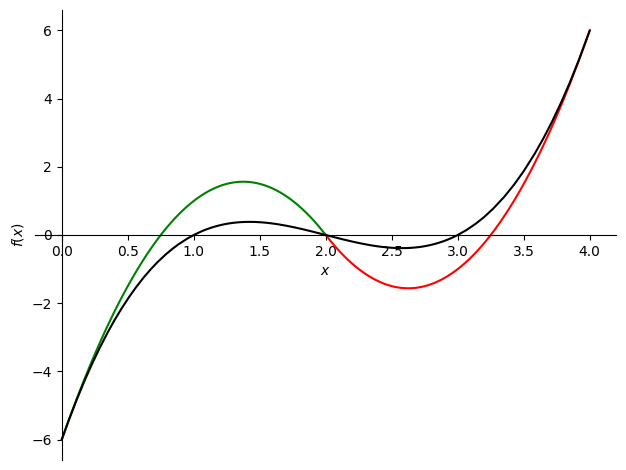

In [15]:
p = sympy.plot(spline1, (x, x0, x1), line_color='green', show=False)
p.extend(sympy.plot(spline2, (x, x1, x2), line_color='red', show=False))
p.extend(sympy.plot(f(x), (x, x0, x2), line_color='black', show=False))
p.show()

## Сплайны scipy.interpolate: interp1d, splrep, InterpolatedUnivariateSpline
https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate
#### Кубический сплайн:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline
####  interp1d
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
####  Полиномы Бернштейна
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BPoly.html#scipy.interpolate.BPoly

Теперь будем строить сплайны средствами scipy.interpolate, вначале подключим необходимые функции:

In [16]:
from scipy.interpolate import interp1d, splrep, splev, InterpolatedUnivariateSpline, BPoly, CubicSpline

## interp1d
Параметры $x$ и  $y$ - координаты узлов сплайна, 
kind - str или int, необязательный параметр, определяющий тип сплайна, по умолчанию линейный (‘linear’), можно сделать ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’ или ‘next’. 

‘zero’, ‘slinear’, ‘quadratic’ и ‘cubic’ обозначают интерполяцию нулевого, первого, второго или третьего порядка,

‘previous’ и ‘next’ просто возвращают предыдущее или следующее значение функции

‘nearest-up’ и ‘nearest’ различаются обработкой полуцелых чисел, таких как 0.5, 1.5.

## Пример 8
Аппроксимировать $f(x) = \sin(x)$ на отрезке $\left[0, 2\pi\right]$ квадратичным сплайном с узлами 
$\frac{\pi k}{4}$, $k = 0, ..., 8$.

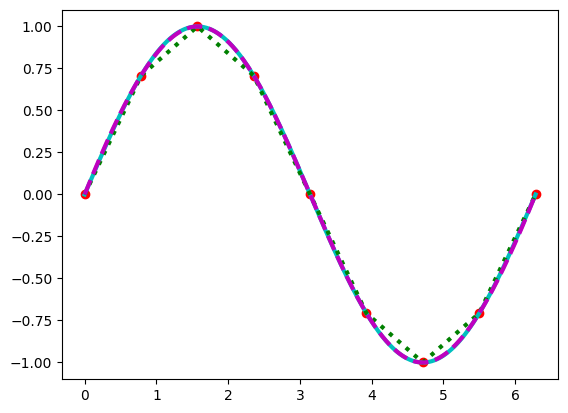

In [17]:
X = [np.pi * k / 4 for k in range(9)]
Y = [np.sin(xk) for xk in X]
plt.scatter(X, Y, color='red')
spl1 = interp1d(X, Y)
spl2 = interp1d(X, Y, kind='cubic')
xs = np.linspace(X[0], X[-1], 1000)
plt.plot(xs, np.sin(xs), 'c-', xs, spl1(xs), 'g:', xs, spl2(xs), 'm--', lw=3)

## Еще один способ построения сплайна: 

splrep функция, которая возвращает представление  B-spline кривой

splev вычисляет значения B-spline или его производных

Есть еще полезные функции:

sproot находит корни кубического B-spline

splint вычисляет определенный интеграл  B-spline на отрезке

spalde вычисляет все производные B-spline

splrep, splev работают на основе FITPACK (написан на Фортране)

## Пример 9. 
Построим сплайн для Примера 7 с помощью splrep и splev.

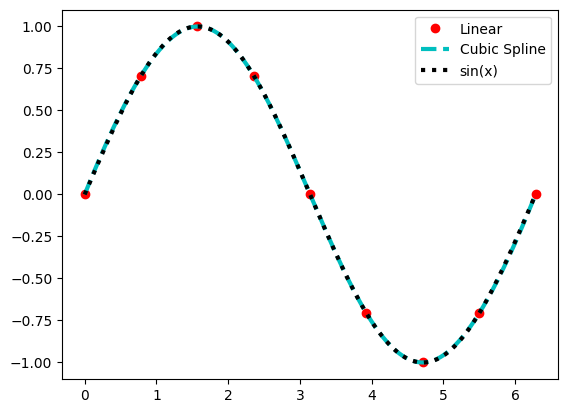

In [18]:
X = [np.pi * k / 4 for k in range(9)]
Y = [np.sin(xk) for xk in X]
tck = splrep(X, Y, s=0)
xnew = np.linspace(X[0], X[-1], 1000)
ynew = splev(xnew, tck, der=0)
plt.plot(X, Y, 'ro', xnew, ynew, 'c--', xnew, np.sin(xnew), 'k:', lw=3)
plt.legend(['Linear', 'Cubic Spline', 'sin(x)'])

## InterpolatedUnivariateSpline
тоже работает на FITPACK.
## Пример 10. 
Построим сплайн для Примера 7 с помощью InterpolatedUnivariateSpline (объектно-ориентированная обертка для функций FITPACK).

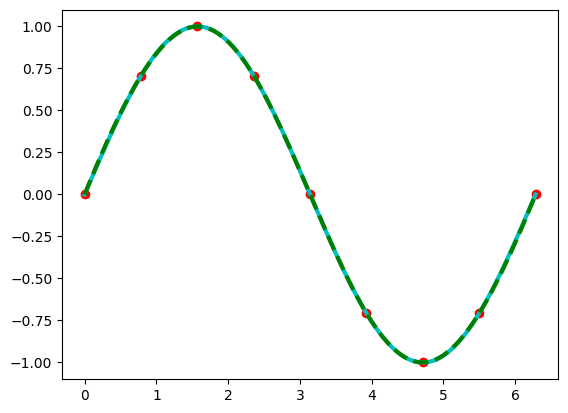

In [19]:
X = [np.pi * k / 4 for k in range(9)]
Y = [np.sin(xk) for xk in X]
spl = InterpolatedUnivariateSpline(X, Y)
xs = np.linspace(X[0], X[-1], 1000)
plt.scatter(X, Y, color='red')
plt.plot(xs, np.sin(xs), 'c-', xs, spl(xs), 'g--', lw=3)

## Пример 11
Построим сплайн для Примера 7 с помощью CubicSpline

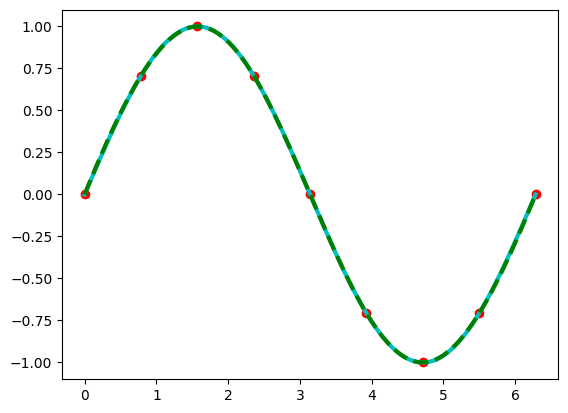

In [20]:
X = [np.pi * k / 4 for k in range(9)]
Y = [np.sin(xk) for xk in X]
cs = CubicSpline(X, Y)
xs = np.linspace(X[0], X[-1], 1000)
plt.scatter(X, Y, color='red')
plt.plot(xs, np.sin(xs), 'c-', xs, cs(xs), 'g--', lw=3)

## Кривые Безье
#### Линейная кривая Безье
$P_0$ и $P_1$ две различные точки, тогда линейная кривая Безье - отрезок, соединяющий эти точки:
$$
B(t) = P_0 + t(P_1 - P_0) = (1 - t)P_0 + tP_1,\quad 1\le t \le 1 
$$
#### Квадратичная кривая Безье
$P_0$, $P_1$ и $P_2$ три различные точки, тогда квадратичная кривая Безье - отрезок, соединяющий эти точки:
$$
B(t) = (1 - t)^2P_0 + 2(1 - t)tP_1 + t^2P_2 = P_1 + (1 - t)^2(P_0 - P_1) + t^2(P_2 - P_1),\quad 1\le t \le 1 
$$
#### Кубическая кривая Безье
$P_0$, $P_1$, $P_2$ и $P_3$ четыре различные точки, тогда кубическая кривая Безье - отрезок, соединяющий эти точки:
$$
B(t) = (1 - t)^3P_0 + 3(1 - t)^2tP_1 + 3(1 - t)t^2P_2 +t^3P_3,\quad 1\le t \le 1 
$$
#### Общий вид кривой Безье
$P_0$, $P_1$, ...  и $P_n$ - $n$ различных точек, тогда линейная кривая Безье - отрезок, соединяющий эти точки:
$$
B(t) = \sum_{k=0}^n C_n^k(1 - t)^{n - k}t^kP_k,\quad 1\le t \le 1 
$$

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

## Пример 12
Построим кривую Безье по точкам $P_1(-1, 3)$, $P_2(0, 4)$, $P_3(3, 2)$.

Для каждой точки построим полином Бернштейна $C_n^k(1 - t)^{n - k}t^k$, $1\le t \le 1$ и составим сумму произведений соответствующих координат точки на полиномы  Бернштейна.

In [21]:
from scipy.special import comb
def my_B(X, Y):
    n = len(X)
    def my_B_x(t):
        return sum([X[k] * comb(n - 1, k) * (1 - t) ** (n - k - 1) * t ** k for k in range(n)])
    def my_B_y(t):
        return sum([Y[k] * comb(n - 1, k) * (1 - t) ** (n - k - 1) * t ** k for k in range(n)])
    return (my_B_x, my_B_y)      

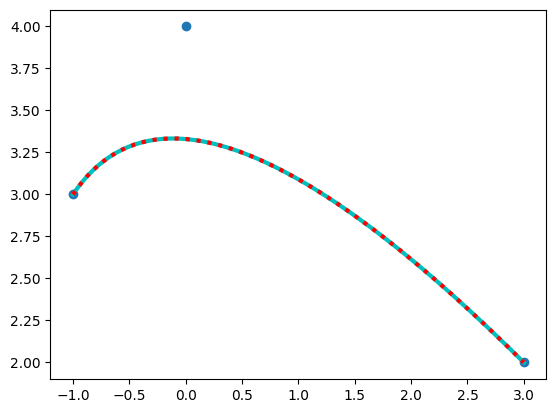

In [22]:
P1 = (-1, 3)
P2 = (0, 4)
P3 = (3, 2)
X = []
Y = []
for point in (P1, P2, P3):
    X.append(point[0])
    Y.append(point[1])
B_x, B_y = my_B(X, Y)
X1 = np.array(X).reshape(3, 1)
Y1 = np.array(Y).reshape(3, 1)
x = [0, 1]
bpX = BPoly(X1, x)
bpY = BPoly(Y1, x)
t_linspace = np.linspace(0, 1)
plt.plot(bpX(t_linspace), bpY(t_linspace),
         'c-', B_x(t_linspace), B_y(t_linspace), 'r:', lw=3)
plt.scatter(X, Y)

## Пример 13
Построим кривую Безье с помощью модуля bezier:

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

In [23]:
!pip install bezier

In [24]:
import bezier

In [25]:
import numpy as np

In [26]:
P1 = (-1, 3)
P2 = (0, 4)
P3 = (3, 2)
X = []
Y = []
for point in (P1, P2, P3):
    X.append(point[0])
    Y.append(point[1])
nodes = np.array([X, Y])
curve = bezier.Curve(nodes, degree=2)
curve

<Curve (degree=2, dimension=2)>

In [27]:
curve.evaluate(0.75)

array([[1.625 ],
       [2.8125]])

In [28]:
s_vals = np.linspace(0.0, 1.0, 5)
curve.evaluate_multi(s_vals)

array([[-1.    , -0.375 ,  0.5   ,  1.625 ,  3.    ],
       [ 3.    ,  3.3125,  3.25  ,  2.8125,  2.    ]])

<AxesSubplot: >

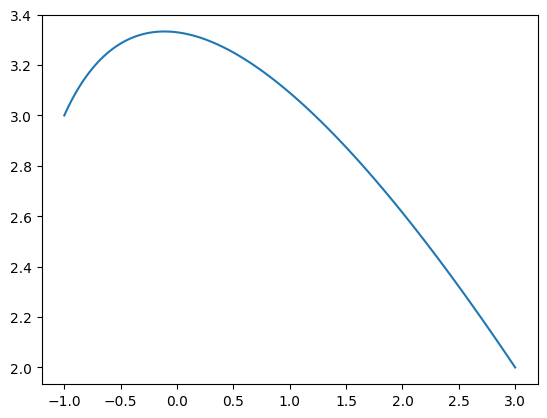

In [29]:
curve.plot(100)

In [30]:
curve.implicitize()

9*x**2 + 12*x*y - 38*x + 4*y**2 + 8*y - 71